In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')


## np.exp() function

In [2]:
## test the numpy exp function (it can take a scalar or a vector as an input)

inp = np.array([1, 2, 3])
print(np.exp(inp))

[ 2.71828183  7.3890561  20.08553692]


## sigmoid function

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


Text(0.5, 0, 'z')

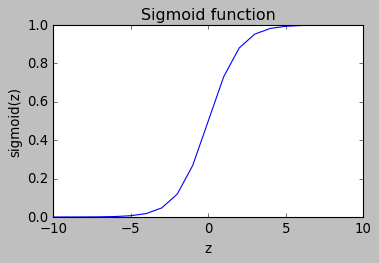

In [16]:
## implement sigmoid function 
##  g(z) = 1/(1 + e**-z)
## where z can be a scalar (single example) or a vector of n values 
## (one for each feature)

def sigmoid(z):
    return (1 / (1 + np.exp(-z)) )

## now test it out, the input z values are between -10 and 10 but the outputs
## are between 0 and 1

zvals = np.arange(-10,11)  # start (inclusive), stop (exclusive), default step is 1

print(zvals)

yvals = sigmoid(zvals)

print(yvals)

## now plot z versus g(z)
## the first two optional arguments define rows and columns of the subplot grid

fig,ax = plt.subplots(1,1,figsize=(5,3))  
ax.plot(zvals, yvals, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')




# Training examples


In [4]:
## we have m=6 training examples, each with n=2 features

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

print(X_train)

m,n = X_train.shape
print(f"there are {m} training examples each with {n} features")

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
there are 6 training examples each with 2 features


# Model parameters 

In [24]:
w_init = np.array([1,1])
b_init = -4

# Plot 2-feature examples with boundary line



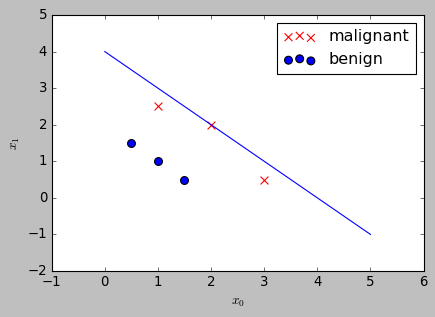

In [25]:
def plot_examples(X, y, w, b):
    """
    scatter plot of positive and negative examples, with boundary
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values for the m examples
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    """

    #2d matrix containing only the pairs for which y=1
    # and same thing for y=0 examples
    Xpos = np.array([X[i] for i in range(m) if y[i]==1])
    Xneg = np.array([X[i] for i in range(m) if y[i]==0])

    ## nb  X[:,0] for 0th column of 2d array
    ## and X[:,1] for 1st column of 2d array

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(Xpos[:,0], Xpos[:,1], marker='x', s=50, c='r', label='malignant')   # plot x0 (column 0) versus x1 (column 1)
    ax.scatter(Xneg[:,0], Xneg[:,1], marker='o', s=50,  c='b', label='benign')
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.legend()

    ## now let's add a decision boundary
    ## in the case of two features we have:
    ## z = w0𝑥0 + w1𝑥1 + b 
    ## the model predicts y=1 for sigmoid(z)>=0.5 and so for z>=0
    ##                    y=0 for sigmoid(z)<0.5  and so for z<0
    ##
    ##  this means the decision boundary is at z = 0, 
    ##        ie the line w0𝑥0 + w1𝑥1 + b =0
    ##           or, equivalently, x1 = -(b + w0𝑥0)/w1    
    #                     that is, y = (w0*x + b)/(-w1)                 

    xvals = np.arange(0,6) 
    yvals = (w_init[0]*xvals + b_init)/(-w_init[1])

    ax.plot(xvals, yvals)

## call the function to test it
plot_examples(X_train, y_train, w_init, b_init)

## Compute logistic loss

logistic loss for one example $x^{(i)}$ with $n$ features

if $y^i= 1$: ------> loss = $-log( f_{w,b}(x^i) )$ 

if $y^i= 0$: ------> loss = $-log( 1 - f_{w,b}(x^i) )$ 

where
   $f_{w,b} = sigmoid(w.x^i + b)$ 

   $w$ and $x^i$ are vectors of size $n$

In [26]:
## Loss is the cost for a single example
## whereas cost is the loss for all the examples

def logistic_loss(xi, yi, w, b):
    """
    xi (ndarray, (n,))   : Training example with n features
    yi (scalar)         : Target value for xi (0 or 1)
    w (ndarray, (n,))   : model parameters
    b (scalar)          : model parameter
    
    """
   # print(f"computing loss for {xi}")
    # compute predicted f_wb = g( w*xi + b)
    #  where g is the sigmoid function
    f_wb = sigmoid(np.dot(w,xi) + b)

  #  print(f"f_wb is {f_wb} and yi is {yi}")

    if yi==0:
      loss = -1 * np.log(f_wb)
    else:
       loss = -1 * np.log(1-f_wb)

    return loss

## call the function to test it
loss=0
for i in range( len(X_train) ):
  lossi = logistic_loss(X_train[i],y_train[i], w_init, b_init)
  print(f"loss for {X_train[i]} is {lossi}")
  loss+=lossi

print(f"total loss is {loss}")

loss for [0.5 1.5] is 2.1269280110429727
loss for [1. 1.] is 2.1269280110429727
loss for [1.5 0.5] is 2.1269280110429727
loss for [3.  0.5] is 0.47407698418010663
loss for [2. 2.] is 0.6931471805599453
loss for [1.  2.5] is 0.47407698418010663
total loss is 8.022085182049077


## compute logistic cost
The logistic cost is the average logistic loss over all the training
examples


In [31]:
## here we use the simplified cost function
## -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
##
## since y[1] is either 0 or 1, this works out to the same
## as using the "if" in the loss function
##
def compute_logistic_cost(X, y, w, b):
    """
    X (ndarray, (m,n))  : m training examples with n features
    y (scalar)          : Target values  (0 or 1)
    w (ndarray, (n,))   : model parameters
    b (scalar)          : model parameter
    
    """ 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost
    

    

the total cost is [0.50368086]


In [32]:
## call the cost function to test it
w_tmp = np.array([1,1])
b_tmp = -4
log_cost= compute_logistic_cost(X_train, y_train, w_tmp, b_tmp)
print(f"the total cost is {log_cost}")

the total cost is [0.50368086]
